In [19]:
import pandas as pd
import os
import json
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: read all json files and combine them into one dataframe

In [20]:
path = ((os.getcwd()).split('\\'))
path.pop()
path  = '\\'.join(path) + '\\Data governance\\data'
data_list = os.listdir(path) 
dfs = []
for file in  data_list:
    f = open(path + '\\' + file)
    data1 = json.load(f)
    df = pd.read_json(data1, orient ='index')
    dfs.append(df.T)
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.head()

,track_id,track_name,track_url,track_popularity,album_id,album_name,countries,album_url,album_image,track_preview,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,3eJMSq78dDaFb7VvhNFnq6,ADMV,https://open.spotify.com/track/3eJMSq78dDaFb7V...,68,6wUJI0qgwrwiYJhFr53Gaa,ADMV,China,https://open.spotify.com/album/6wUJI0qgwrwiYJh...,https://i.scdn.co/image/ab67616d0000b273adab96...,https://open.spotify.com/embed/track/3eJMSq78d...,...,-4.959,1,0.0556,0.817,0.0,0.126,0.708,163.781,193700,4
1,0Snbzbd74RLfL0i4nn1vU5,Favorito,https://open.spotify.com/track/0Snbzbd74RLfL0i...,65,5wb9Mx2yfXZzKYPzHp4fae,Favorito,China,https://open.spotify.com/album/5wb9Mx2yfXZzKYP...,https://i.scdn.co/image/ab67616d0000b273e8caae...,https://open.spotify.com/embed/track/0Snbzbd74...,...,-2.982,1,0.0598,0.229,0.0,0.232,0.823,178.032,211613,4
2,7k4t7uLgtOxPwTpFmtJNTY,Tusa,https://open.spotify.com/track/7k4t7uLgtOxPwTp...,76,7mKevNHhVnZER3BLgI8O4F,Tusa,China,https://open.spotify.com/album/7mKevNHhVnZER3B...,https://i.scdn.co/image/ab67616d0000b273ddd315...,https://open.spotify.com/embed/track/7k4t7uLgt...,...,-3.28,1,0.298,0.295,0.000134,0.0574,0.574,101.085,200960,4
3,4uziEsK1yiqdauKVDPsmVG,Rojo,https://open.spotify.com/track/4uziEsK1yiqdauK...,64,54lqxBRUg66EYNyqKSKU5C,Rojo,China,https://open.spotify.com/album/54lqxBRUg66EYNy...,https://i.scdn.co/image/ab67616d0000b273ead7b9...,https://open.spotify.com/embed/track/4uziEsK1y...,...,-4.04,1,0.113,0.15,0.000115,0.0842,0.444,172.27,150853,4
4,4Pu0a2TuHOYtI4CCE3HEXI,Sigues Con El - Remix,https://open.spotify.com/track/4Pu0a2TuHOYtI4C...,64,0vPG06qvqmD1XL1uAFysKM,Sigues Con El (Remix),China,https://open.spotify.com/album/0vPG06qvqmD1XL1...,https://i.scdn.co/image/ab67616d0000b273d38e4b...,https://open.spotify.com/embed/track/4Pu0a2TuH...,...,-2.97,0,0.298,0.102,0.000003,0.0872,0.736,175.994,189567,4


In [21]:
#drop duplicate songs
before = len(combined_df)
combined_df = combined_df.drop_duplicates(subset = 'track_name')
after = len(combined_df)
data  = [before, after]
col  = ['Before_Drop', 'After_Drop']
fig = px.bar(x= data,y = col, title = 'drop duplicate', color = col)
fig.show()

In [4]:
combined_df.nunique()

track_id             949
track_name           949
track_url            949
track_popularity      97
album_id             790
album_name           782
countries             19
album_url            790
album_image          790
track_preview        949
artist_id            519
artist_name          519
artist_url           519
artist_image         514
artist_genre         113
artist_followers     537
artist_popularity     89
record_date            4
Country               19
danceability         465
energy               526
key                   12
loudness             907
mode                   2
speechiness          593
acousticness         736
instrumentalness     553
liveness             480
valence              560
tempo                930
duration_ms          939
time_signature         4
dtype: int64

In [26]:
# select feature and genre
combined_df = combined_df[['artist_genre',  'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'track_popularity']]
combined_df.columns = ['genre',  'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature','track_popularity']

In [27]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 3252
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   genre             949 non-null    object
 1   danceability      949 non-null    object
 2   energy            949 non-null    object
 3   key               949 non-null    object
 4   loudness          949 non-null    object
 5   mode              949 non-null    object
 6   speechiness       949 non-null    object
 7   acousticness      949 non-null    object
 8   instrumentalness  949 non-null    object
 9   liveness          949 non-null    object
 10  valence           949 non-null    object
 11  tempo             949 non-null    object
 12  duration_ms       949 non-null    object
 13  time_signature    949 non-null    object
 14  track_popularity  949 non-null    object
dtypes: object(15)
memory usage: 118.6+ KB


In [30]:
#change data type:
combined_df['danceability'] = combined_df['danceability'].astype(float)
combined_df['energy'] = combined_df['energy'].astype(float)
combined_df['key'] = combined_df['key'].astype(int)
combined_df['loudness'] = combined_df['loudness'].astype(float)
combined_df['mode'] = combined_df['mode'].astype(int)
combined_df['speechiness'] = combined_df['speechiness'].astype(float)
combined_df['acousticness'] = combined_df['acousticness'].astype(float)
combined_df['instrumentalness'] = combined_df['instrumentalness'].astype(float)
combined_df['liveness'] = combined_df['liveness'].astype(float)
combined_df['valence'] = combined_df['valence'].astype(float)
combined_df['tempo'] = combined_df['tempo'].astype(float)
combined_df['duration_ms'] = combined_df['duration_ms'].astype(int)
combined_df['genre'] = combined_df['genre'].astype(str)
combined_df['time_signature'] = combined_df['time_signature'].astype(int)
combined_df['track_popularity'] = combined_df['track_popularity'].astype(int)
print(combined_df.dtypes)

genre                object
danceability        float64
energy              float64
key                   int32
loudness            float64
mode                  int32
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int32
time_signature        int32
track_popularity      int32
dtype: object


In [31]:
combined_df["genre"].value_counts()

rock            163
Null            127
pop             119
mexican          42
german           35
               ... 
metalcore         1
sad               1
binaural          1
saskatchewan      1
otacore           1
Name: genre, Length: 113, dtype: int64

Remove missing Genre

In [32]:
import plotly.graph_objects as go
#filter the Null genre
combined_df = combined_df[combined_df["genre"] != 'Null']
# visualise genre
genre_counts = combined_df["genre"].value_counts()
genre_counts_df = pd.DataFrame({
    'genre': genre_counts.index,
    'count': genre_counts.values
})
fig = go.Figure(data=[go.Bar(
    x=genre_counts_df['genre'], y=genre_counts_df['count'],
    text=genre_counts_df['count'], textposition='auto'
)])

fig.update_layout(title='genre_counts', xaxis_title='Genre', yaxis_title='Count')

fig.show()

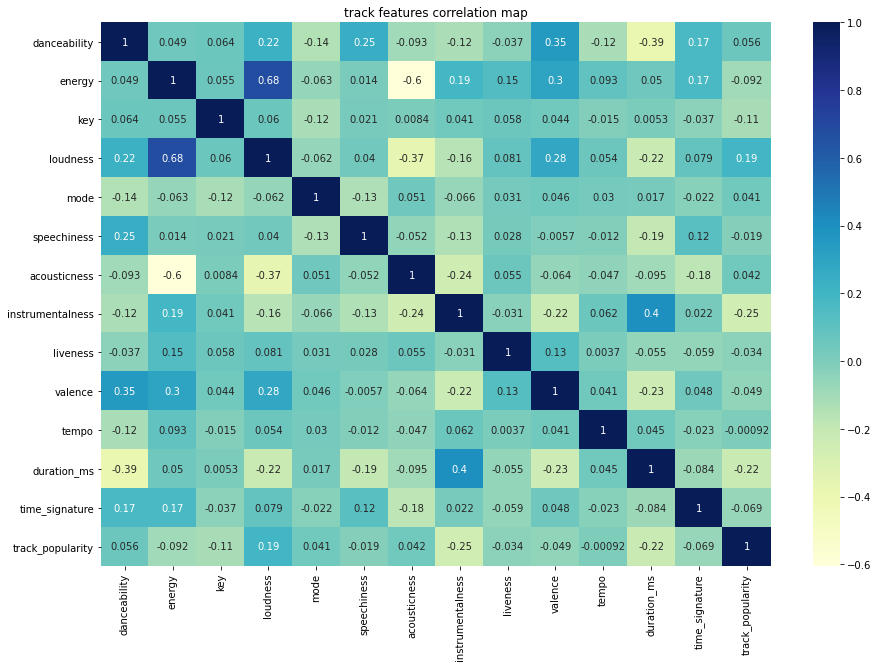

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(combined_df.corr(), annot=True, cmap='YlGnBu')
plt.title('track features correlation map')
plt.show()

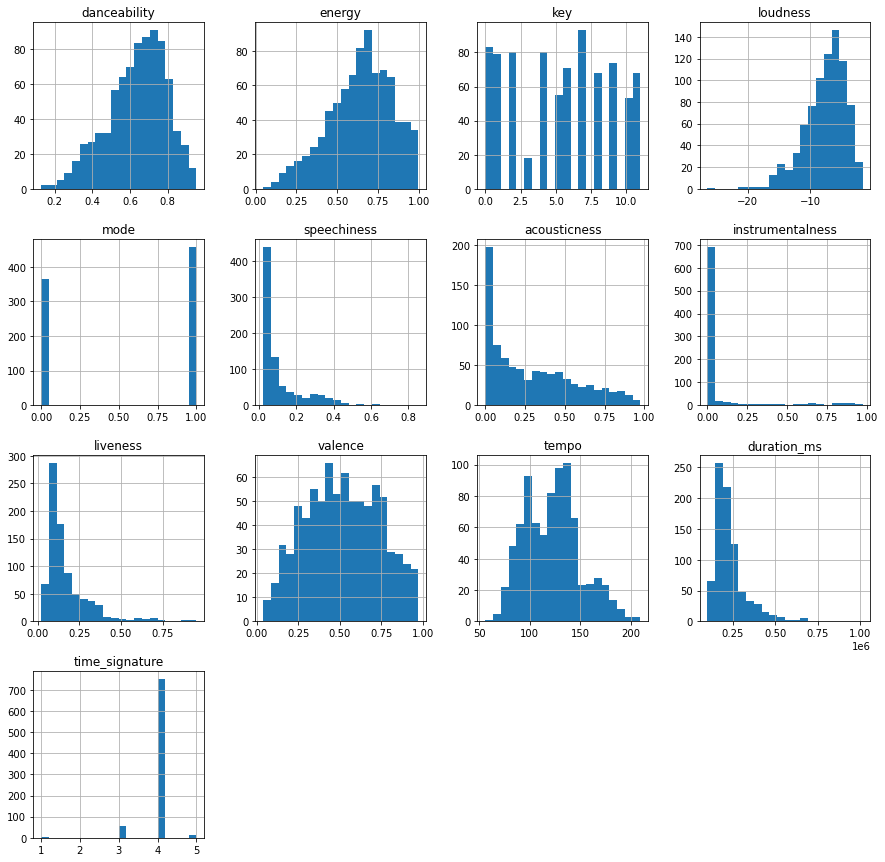

In [18]:
combined_df.hist(bins=20, figsize=(15,15))
plt.show()

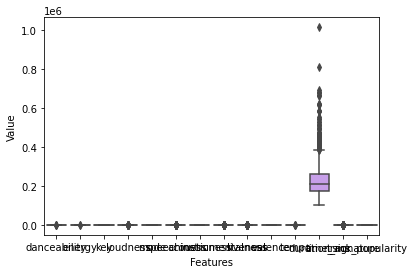

In [35]:
sns.boxplot(data=combined_df.drop(['genre'], axis=1))
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

there are two problems:

1. some variables are skewed. eg. liveness, speechiness


2. features are not on the same scale, eg. duration_ms is much larger than others

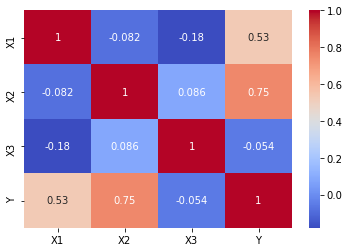

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample dataset with three independent variables
data = {'X1': np.random.normal(0, 1, 100),
        'X2': np.random.normal(0, 1, 100),
        'X3': np.random.normal(0, 1, 100)}

df = pd.DataFrame(data)

# Add a dependent variable that is highly correlated with X1 and X2, but not X3
df['Y'] = 2*df['X1'] + 3*df['X2'] + np.random.normal(0, 1, 100)

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()